In [2]:
import numpy as np
from numpy.random import default_rng
from scipy import stats
import math

In [10]:
lista_poder = []
rg = default_rng(42)
amostras_totais = 3000

for p in np.linspace(0.95, 0.5, 100):

    proporcao_controle = p
    proporcao_tratamento = 1 - p

    n1 = int(amostras_totais * proporcao_controle)
    n2 = int(amostras_totais * proporcao_tratamento)

    p1_observed = 0.2444
    p2_observed = 0.2935

    alpha = 0.05

    p_combined = (p1_observed * n1 + p2_observed * n2) / (n1+n2)

    SE = math.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))

    z_critical = stats.norm.pdf(1 - alpha/2)

    z_value = (p1_observed - p2_observed)/ SE

    power_proportion = stats.norm.cdf(z_value - z_critical) + (1 - stats.norm.cdf(z_value + z_critical))

    lista_poder.append(power_proportion)

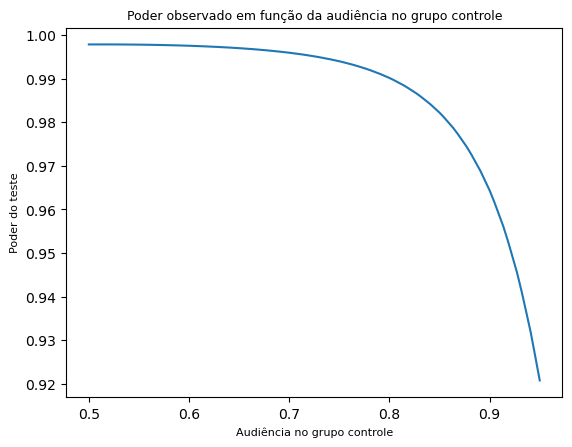

In [11]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(0.95, 0.5, 100), lista_poder)
plt.xlabel('Audiência no grupo controle', size=8)
plt.ylabel('Poder do teste', size=8)
plt.title('Poder observado em função da audiência no grupo controle', size=9)
plt.show()